In [1]:
import pathlib

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
import numpy as np
import seaborn as sns

In [2]:
results_dir = pathlib.Path('results')

plot_data = []
for p in results_dir.iterdir():
    if p.is_dir():
        # parse the directory name
        args = p.name.split('-')
        if len(args) <= 1:
            continue
        rand_distribution = args[0]
        train_losses = np.load(p / 'train_losses.npy')
        validation_losses = np.load(p / 'validation_losses.npy')
        df_train = pd.DataFrame({
            'loss_type': 'train',
            'loss': train_losses / train_losses[0],
            'rand_distribution': rand_distribution,
            'epoch': np.arange(len(train_losses))
        })

        df_validation = pd.DataFrame({
            'loss_type': 'validation',
            'loss': validation_losses / validation_losses[0],
            'rand_distribution': rand_distribution,
            'epoch': np.arange(len(validation_losses))
        })

        plot_data.append(df_train)
        plot_data.append(df_validation)

plot_data = pd.concat(plot_data)

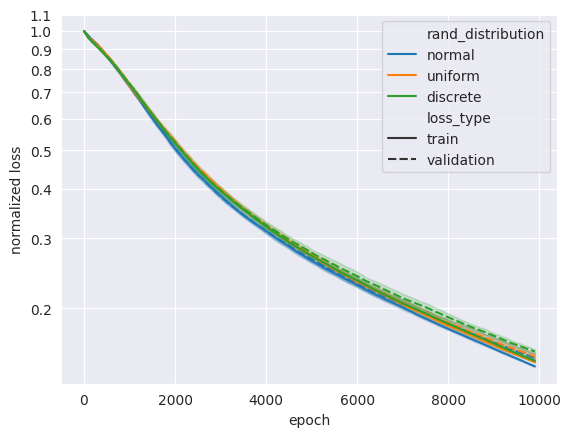

In [3]:
fig, ax = plt.subplots()
sns.lineplot(
    data=plot_data[::100],
    x='epoch',
    y='loss',
    hue='rand_distribution',
    style='loss_type',
    ax=ax,
)

ax.set(yscale='log')
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_ylabel('normalized loss')
fig.savefig('rand_projections.pdf', bbox_inches='tight')